In [1]:
# import torch
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
from IPython.core.pylabtools import figsize
figsize(25, 10)

# Binary Classification Task
* The network must identify if a point is above the line $y=x$
    * Predicting $1$ indicates above, $0$ below
* Neurons are rewarded $1$ for correct prediction, $-1$ for incorrect

<img src='https://gitlab.ics.uci.edu/jott1/neuronrl/raw/master/Figures/binary.gif'>

# Results
---
* Plot legends indicate how often an update was performed
    * e.g. **25:** Neurons in the network were updated after every 25 episodes
* Left plots show neurons rewarded only with the task reward
* Right plots show neurons rewarded with task, prediction, and sparsity rewards
    * In the case of $0$ hidden layers and $1$ output neuron only the task reward was applied
    * Cannot evaluate things like sparsity and next neuron prediction for only a single neuron
* Each setting was tried 10 times 

In [3]:
NUM_LAYERS   = range(0,10)
UPDATE_EVERY = [1, 5, 10, 25]
NEURON_TYPE  = ['DQN', 'PG']
REWARD_TYPE  = ['task', 'all','bio','bio_then_all']
ENVIRONMENT  = ['binary', 'cart']

def plot(df, env='binary', update_type='sync'):
    plot_count = 1
    for neuron_type in NEURON_TYPE:
        for reward_type in REWARD_TYPE:
            plt.subplot(2,4,plot_count)
            for i in NUM_LAYERS:
                data = df[
                    (df['env'] == env) & 
                    (df['num_layers'] == i) & 
                    (df['reward_type'] == reward_type) &  
                    (df['neuron_type'] == neuron_type) &
                    (df['update_type'] == update_type)
                    ].reset_index(drop=True)
                # sns.lineplot(x='trials', y='rewards', data=data, label=str(i))
                if data.empty: continue 
                    
                best_num = data.iloc[data['rewards'].idxmax()]['repeat_num']
                data = data[data['repeat_num'] == best_num].reset_index()
                                       
                plt.plot(data['trials'], data['rewards'], label=str(i))
            plt.title(neuron_type +'-'+ reward_type); plt.legend()
            
            plot_count += 1

    plt.show()

In [4]:
df = pd.read_csv('RL/results.csv')

### Binary Classification
* As this is not a temporal task the discount factor, $\gamma$, was set to zero

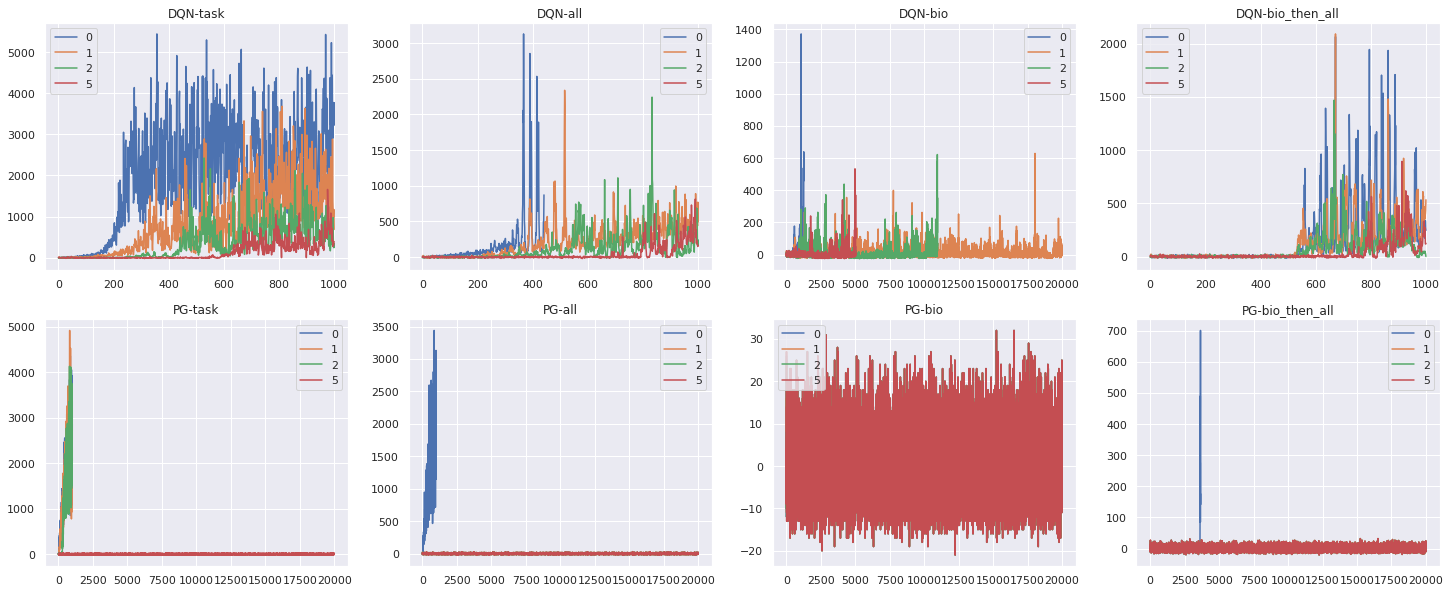

In [5]:
plot(df, env='binary', update_type='sync') # NO HIDDEN LAYERS AND 1 OUTPUT NEURON

In [6]:
# plot(df, env='binary', update_type='async') # NO HIDDEN LAYERS AND 1 OUTPUT NEURON

### CartPole
* As this is a temporal task the discount factor, $\gamma$, was set to $0.99$

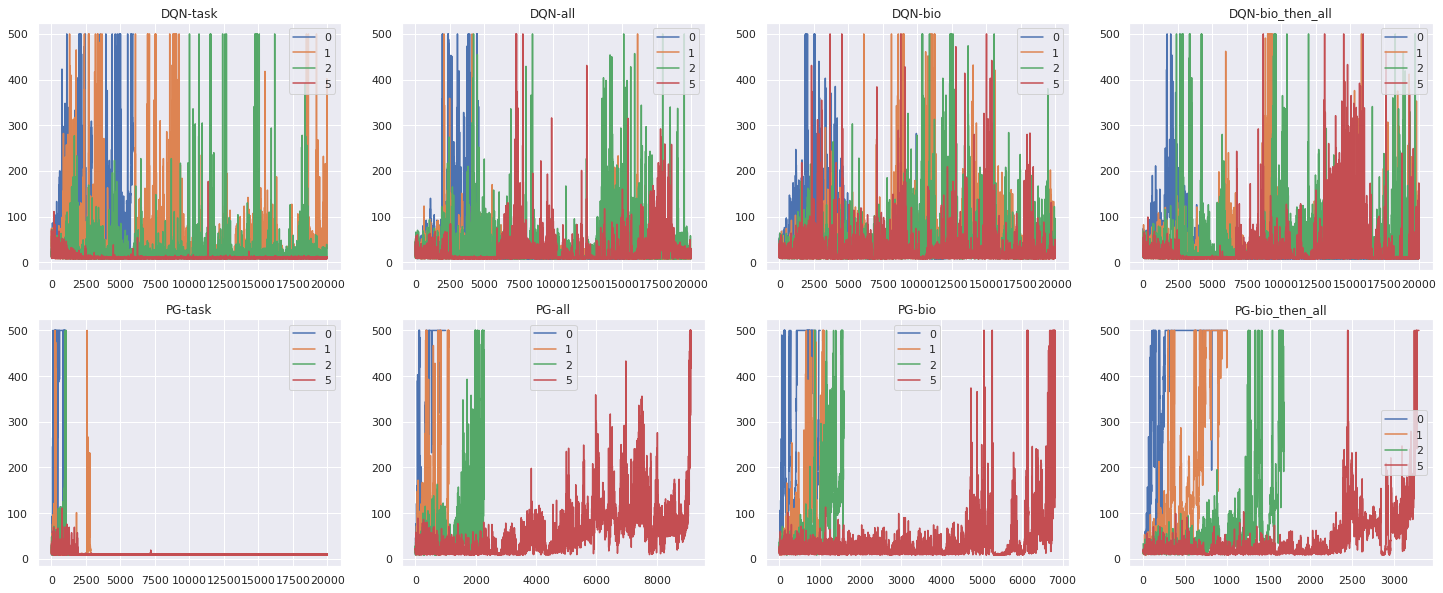

In [7]:
plot(df, env='cart', update_type='sync') # NO HIDDEN LAYERS AND 1 OUTPUT NEURON

In [8]:
# plot(df, env='cart', update_type='async') # NO HIDDEN LAYERS AND 1 OUTPUT NEURON

In [11]:
cart = df[df['env'] == 'cart'].reset_index(drop=True)
gb_all = cart.groupby(['reward_type', 'neuron_type', 'num_layers', 'repeat_num']).max()
trials = gb_all.groupby(['reward_type', 'neuron_type', 'num_layers'])['trials'].mean().reset_index()
table = trials.pivot_table(index='reward_type',columns=['neuron_type', 'num_layers'])

In [12]:
print(table.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{8}{l}{trials} \\
neuron\_type & \multicolumn{4}{l}{DQN} & \multicolumn{4}{l}{PG} \\
num\_layers &             0 &        1 &        2 &        5 &       0 &       1 &        2 &        5 \\
reward\_type  &               &          &          &          &         &         &          &          \\
\midrule
all          &  19739.111111 &  19998.0 &  19998.0 &  19998.0 &  1029.8 &  1480.4 &   1909.6 &   4824.4 \\
bio          &  16297.000000 &  19998.0 &  19998.0 &  19998.0 &  1086.4 &  1727.3 &   1619.3 &   4983.0 \\
bio\_then\_all &  18308.500000 &  19998.0 &  19998.0 &  19998.0 &  1115.9 &  1275.7 &   3718.2 &   5976.7 \\
task         &   6973.300000 &  19024.0 &  19998.0 &  19998.0 &  1025.6 &  7691.4 &  19998.0 &  19998.0 \\
\bottomrule
\end{tabular}

